In [1]:
# let's import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np

# let's import our file
df_sales = pd.read_csv("/Users/doris/OneDrive/Documents/Online Sales Data.csv")
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [2]:
# let's see table head
df_sales.head()
df_sales.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


In [3]:
# let's drop columns we don't need
df_sales = df_sales.drop(['Transaction ID'], axis='columns')
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              240 non-null    object 
 1   Product Category  240 non-null    object 
 2   Product Name      240 non-null    object 
 3   Units Sold        240 non-null    int64  
 4   Unit Price        240 non-null    float64
 5   Total Revenue     240 non-null    float64
 6   Region            240 non-null    object 
 7   Payment Method    240 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 15.1+ KB


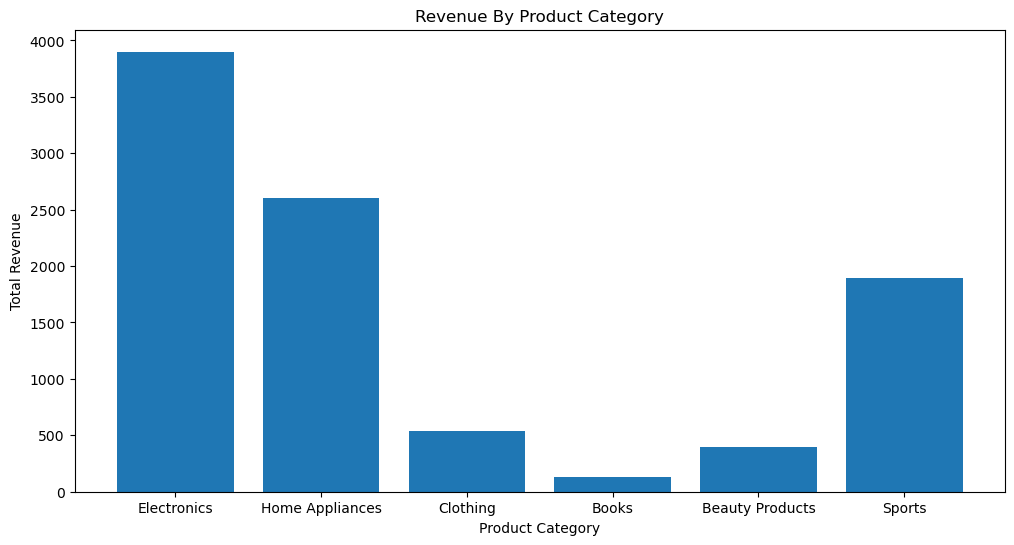

In [4]:
# let's visualize the relationship between the product category and total revenue
plt.figure(figsize=(12, 6))
plt.title('Revenue By Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.bar(df_sales['Product Category'], df_sales['Total Revenue'])
plt.show()

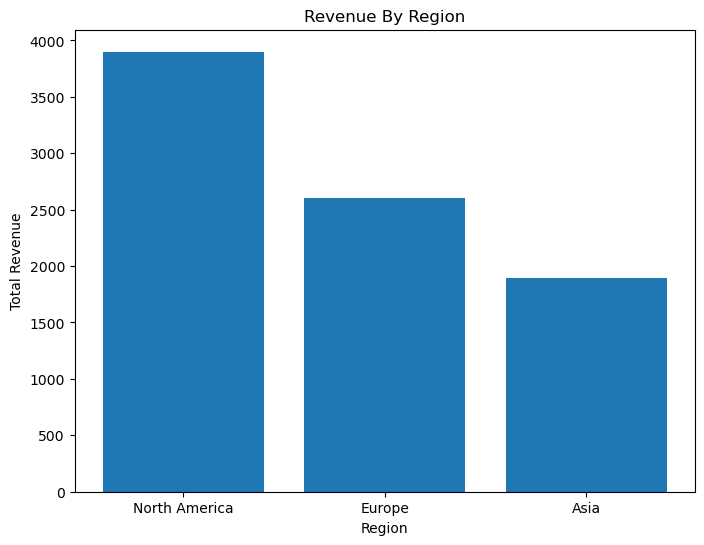

In [5]:
# let's visualize the relationship between the region and total revenue
plt.figure(figsize=(8, 6))
plt.title('Revenue By Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.bar(df_sales['Region'], df_sales['Total Revenue'])
plt.show()

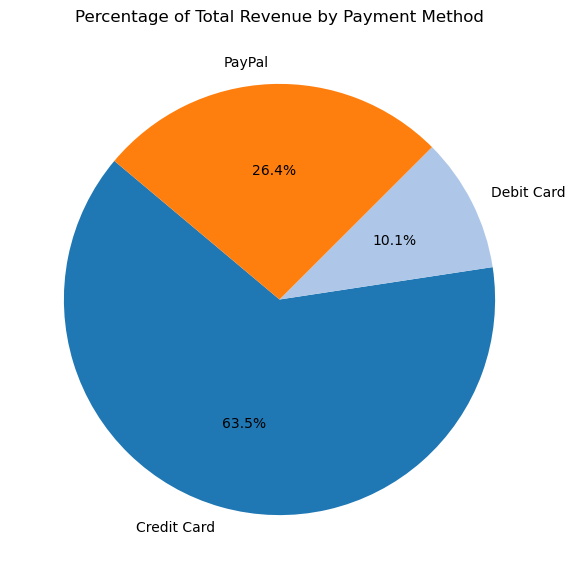

In [6]:
# let's visualize the payment distribution using a pie chart
# Ensure the columns are named correctly, e.g., 'Revenue' and 'Payment Method'
# Aggregate the data to get the total revenue per payment method
agg_df_sales = df_sales.groupby('Payment Method')['Total Revenue'].sum()

# Create the pie chart
plt.figure(figsize=(10, 7))
plt.pie(agg_df_sales, labels=agg_df_sales.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)

# Customize the plot
plt.title('Percentage of Total Revenue by Payment Method')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Unit Price vs. Units Sold')

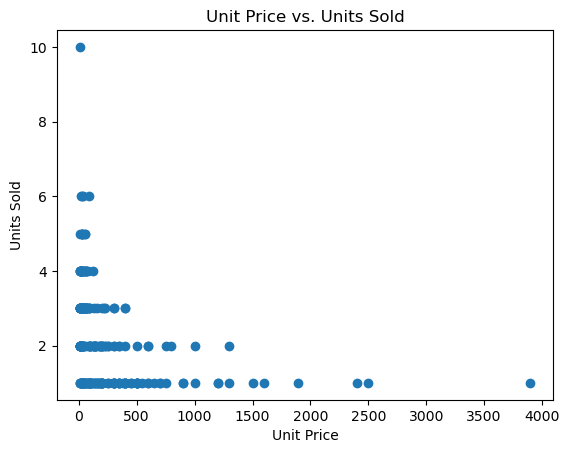

In [7]:
# Is there a relationship between the units sold and the unit price?
plt.scatter(x=df_sales['Unit Price'], y=df_sales['Units Sold'])
plt.xlabel('Unit Price')
plt.ylabel('Units Sold')
plt.title('Unit Price vs. Units Sold')

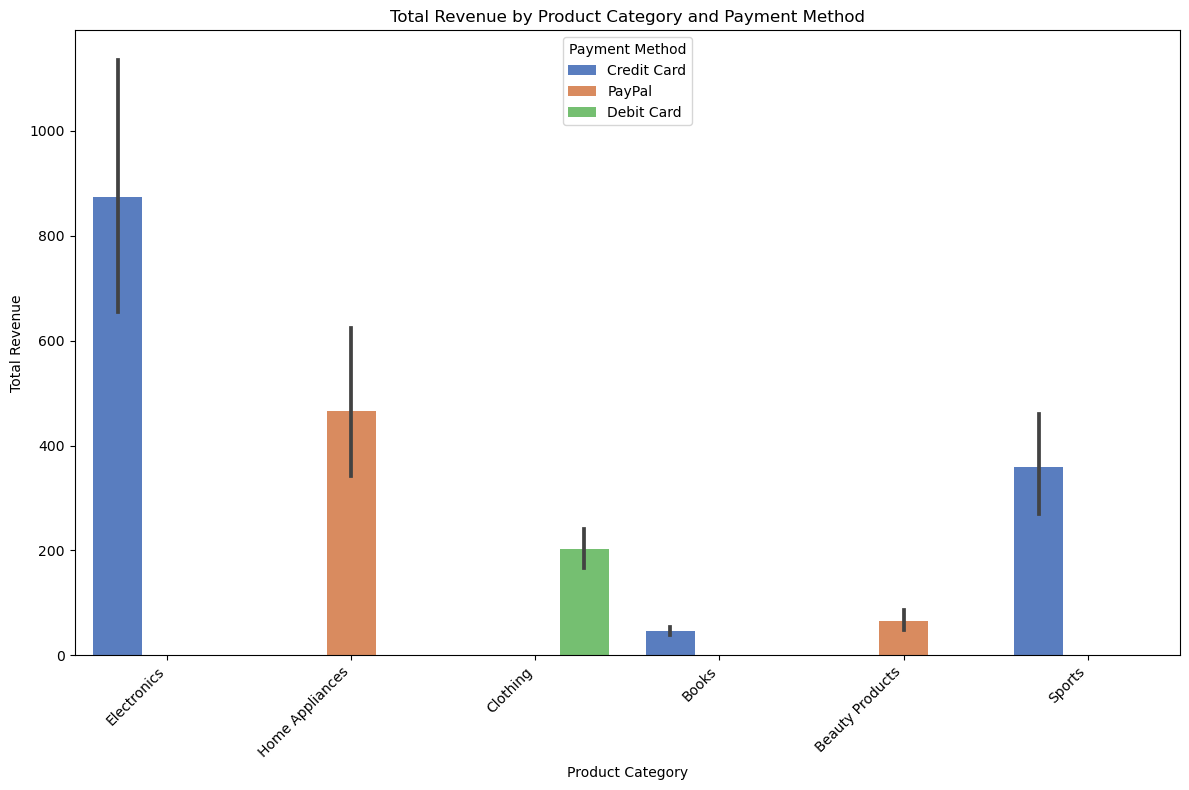

In [8]:
# let's visualize our Total Revenue breakdown by Product Category and Payment Method
# Plot the grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Product Category', y='Total Revenue', hue='Payment Method', data=df_sales, palette='muted')
plt.title('Total Revenue by Product Category and Payment Method')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Payment Method')
plt.tight_layout()
plt.show()

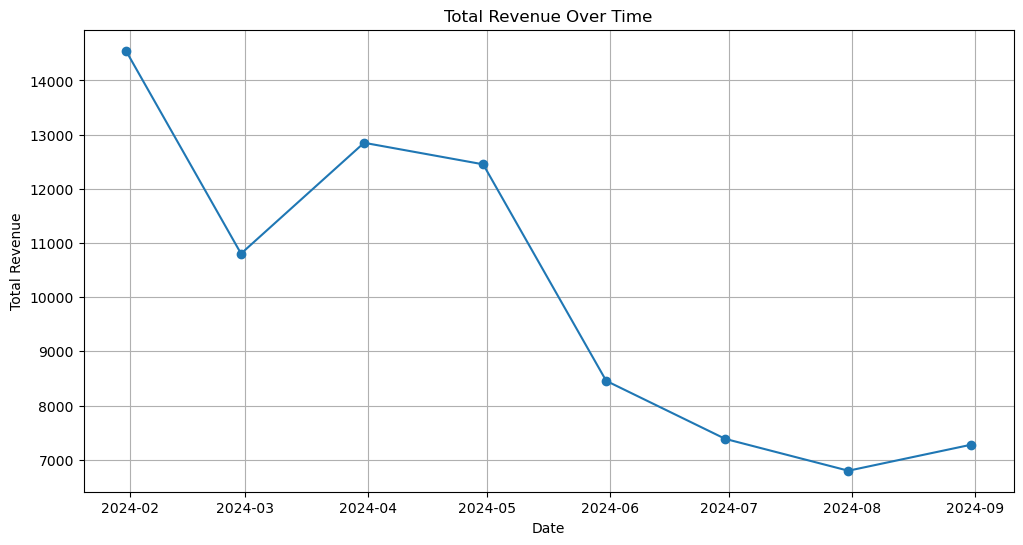

In [9]:
# Convert date from string to datetime
df_sales['Date'] = pd.to_datetime(df_sales['Date'], format='%Y-%m-%d')


# let's create the line plot for Total Revenue over Time
df_sales.set_index('Date', inplace=True)
monthly_revenue = df_sales['Total Revenue'].resample('M').sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o')
plt.title('Total Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

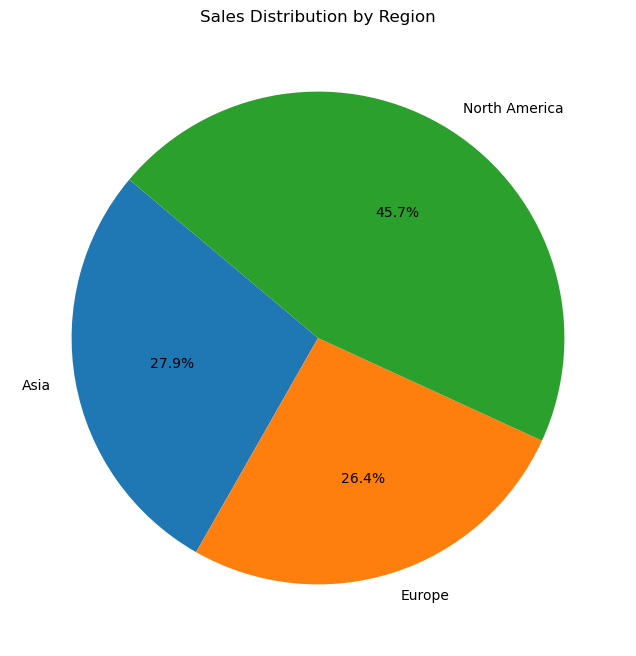

In [10]:
# Let's create a Pie Chart of Sales Distribution by Region
region_sales = df_sales.groupby('Region')['Total Revenue'].sum()

plt.figure(figsize=(8, 8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Region')
plt.show()

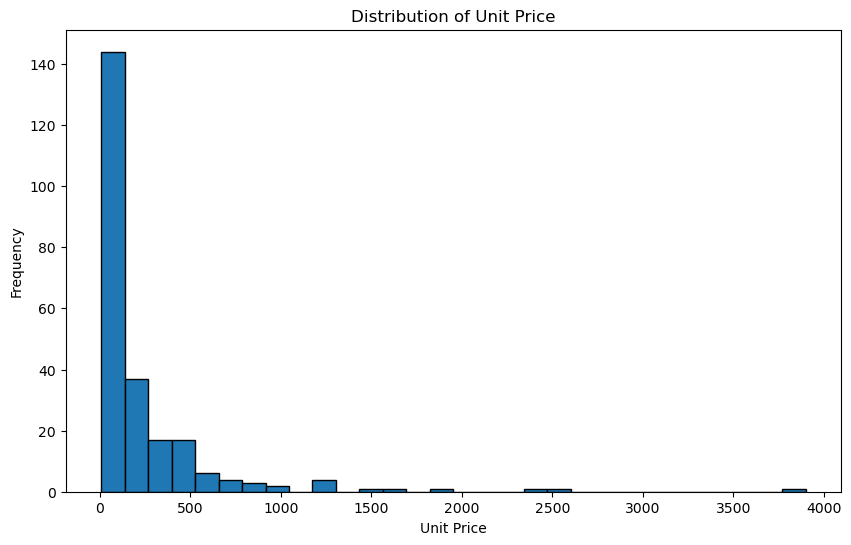

In [11]:
# Let's create a Histogram of Unit Price
plt.figure(figsize=(10, 6))
plt.hist(df_sales['Unit Price'], bins=30, edgecolor='k')
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

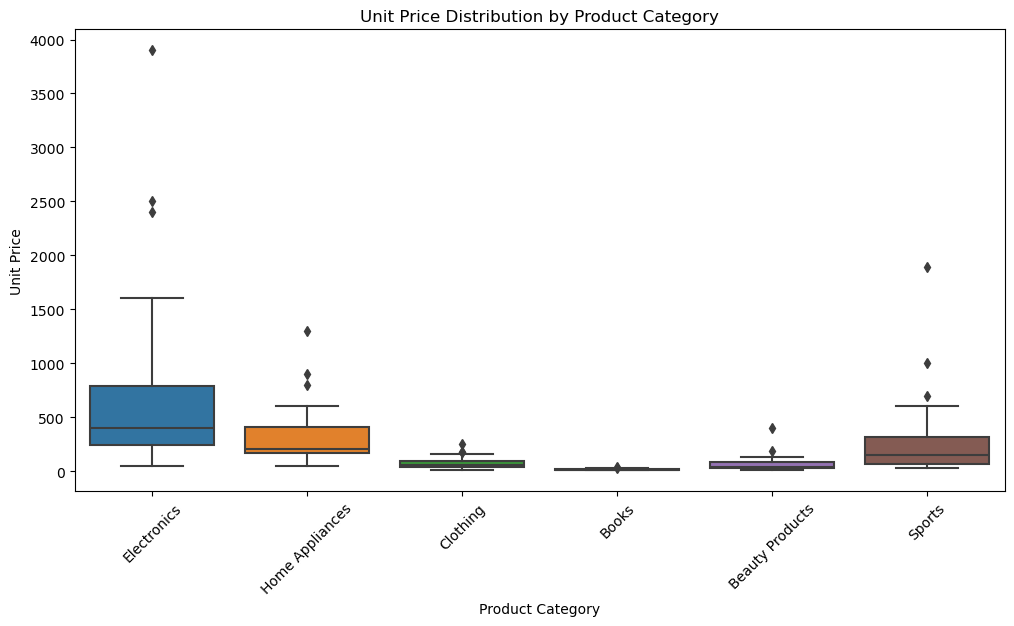

In [12]:
# Let's create a Box Plot of Unit Price by Product Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product Category', y='Unit Price', data=df_sales)
plt.title('Unit Price Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Unit Price')
plt.xticks(rotation=45)
plt.show()

Machine Learning Model for Prediction

In [13]:
# Let's start with Preprocessing and Model Building
# Feature selection
# Reset the index
df_sales.reset_index(inplace=True)
features = ['Date', 'Product Category', 'Units Sold', 'Unit Price', 'Region', 'Payment Method']
X = df_sales[features]
y = df_sales['Total Revenue']

# Convert date to ordinal for simplicity
X.loc[:, 'Date'] = pd.to_datetime(X['Date']).map(pd.Timestamp.toordinal)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for categorical data
categorical_features = ['Product Category', 'Region', 'Payment Method']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # To include the rest of the numeric features as they are
)

# Create the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 19752.625269746273


Prediction for the Rest of the Year

In [23]:
# Generating future dates from September 2024 to December 2024
future_dates = pd.date_range(start='2024-09-01', end='2024-12-31', freq='M')

# Creating a function to compute historical averages
def compute_averages(df_sales, groupby_cols, avg_col):
    return df_sales.groupby(groupby_cols)[avg_col].mean().reset_index()

# Compute historical averages
avg_unit_sold = compute_averages(df_sales, ['Product Category', 'Region', 'Payment Method'], 'Units Sold')
avg_unit_price = compute_averages(df_sales, ['Product Category', 'Region', 'Payment Method'], 'Unit Price')

# Creating a DataFrame for future predictions
future_df = pd.DataFrame(future_dates, columns=['Date'])

# Create a placeholder for each combination of product category, region, and payment method
placeholders = avg_unit_sold.merge(avg_unit_price, on=['Product Category', 'Region', 'Payment Method'])

# Expand the placeholders for each future date
future_df = pd.merge(future_df, placeholders, how='cross')

# Convert date to ordinal
future_df['Date'] = future_df['Date'].map(pd.Timestamp.toordinal)

# Predict total revenue for future dates
future_revenue = model.predict(future_df)

# Convert back to datetime for readable dates
future_df['Date'] = future_df['Date'].apply(lambda x: pd.Timestamp.fromordinal(x))

# Create a DataFrame to display future predictions
predicted_revenue_df = pd.DataFrame({
    'Date': future_df['Date'],
    'Product Category': future_df['Product Category'],
    'Region': future_df['Region'],
    'Payment Method': future_df['Payment Method'],
    'Predicted Total Revenue': future_revenue
})

print(predicted_revenue_df)


         Date Product Category         Region Payment Method  \
0  2024-09-30  Beauty Products         Europe         PayPal   
1  2024-09-30            Books  North America    Credit Card   
2  2024-09-30         Clothing           Asia     Debit Card   
3  2024-09-30      Electronics  North America    Credit Card   
4  2024-09-30  Home Appliances         Europe         PayPal   
5  2024-09-30           Sports           Asia    Credit Card   
6  2024-10-31  Beauty Products         Europe         PayPal   
7  2024-10-31            Books  North America    Credit Card   
8  2024-10-31         Clothing           Asia     Debit Card   
9  2024-10-31      Electronics  North America    Credit Card   
10 2024-10-31  Home Appliances         Europe         PayPal   
11 2024-10-31           Sports           Asia    Credit Card   
12 2024-11-30  Beauty Products         Europe         PayPal   
13 2024-11-30            Books  North America    Credit Card   
14 2024-11-30         Clothing          

In [33]:
future_dates = pd.date_range(start='2024-09-01', end='2024-12-31', freq='M')

# Creating a DataFrame for future predictions
future_df = pd.DataFrame(future_dates, columns=['Date'])

# Add other columns with placeholder values (average values or mode)
# You might want to replace these with more realistic values based on your domain knowledge.
future_df['Product Category'] = 'category1'  # Replace 'category1' with a relevant category
future_df['Units Sold'] = df_sales['Units Sold'].mean()
future_df['Unit Price'] = df_sales['Unit Price'].mean()
future_df['Region'] = 'region1'  # Replace 'region1' with a relevant region
future_df['Payment Method'] = 'method1'  # Replace 'method1' with a relevant payment method

# Convert date to ordinal
future_df['Date'] = future_df['Date'].map(pd.Timestamp.toordinal)

# Predict total revenue for future dates
future_revenue = model.predict(future_df)

# Create a DataFrame to display future predictions
predicted_revenue_df = pd.DataFrame({
    'Date': future_dates,
    'predicted_total_revenue': future_revenue
})

print(predicted_revenue_df)

        Date  predicted_total_revenue
0 2024-09-30               225.732862
1 2024-10-31               202.686131
2 2024-11-30               180.382843
3 2024-12-31               157.336112
